In [219]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering

Sources:

* CSV
* programmatic download from website (by requests library)
* Twitter API's JSON data (by tweepy library)

In [417]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
# archive_df.sample(3)
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [418]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
file_name = url.split('/')[-1]
file_full_path = os.path.join(folder, file_name)

with open(file_full_path, mode='wb') as file:
    file.write(response.content)
    
img_predictions_df = pd.read_csv(file_full_path, sep='\t')
# img_predictions_df.sample(3)
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Sensitive data : hide your keys before sharing notebook with others.

In [4]:
key = "D0cfoN3lSbarsaAxvEXCUbZc9"
# key = "*************************"

key_secret = "rNpQCzw3yMGlFbbniR2k1yFIxtAfoeVDUFVjWxbBK64WUmSTdO"
# key_secret = "**********************"

token = "3372549790-dpzzgYi2mwLId4TzOVc0RjK4Z7kk7mK0EA4SRgg"
# token = "***********************"

token_secret = "v5fIYYvsfUMnrr2xPL7HFHOLnLJ5uWhWpRY2yYrIxZ6Cr"
# token_secret = "***************************"


auth = tweepy.OAuthHandler(key, key_secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth)

In [6]:
############################### Test ##########################
# try:
#     api.verify_credentials()
#     print("Authentication OK")
# except:
#     print("Error during authentication")


# exp_tweet = api.get_status(archive_df.tweet_id[1000], tweet_mode='extended')
# content = exp_tweet._json
# print(content)
###############################################################

tweet_ids = list(archive_df.tweet_id)

if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as file:
        tweet_data = {}    
        for tweet in tweet_ids:
            try:
                tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
                tweet_data[str(tweet)] = tweet_status._json
        #             print(tweet_data[str(tweet)], '\n')
            except:
                print("Error for tweet_id: {}".format(tweet))
        json.dump(tweet_data, file)

In [419]:
# check for file's size
# print(os.path.getsize('tweet_json.txt'))
with open('tweet_json.txt') as file:   
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
# tweets_df.sample(5)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2330 non-null   object
 1   retweets   2330 non-null   int64 
 2   favorites  2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [8]:
archive_df.info()
# archive_df['name'].sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
img_predictions_df.info()
img_predictions_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
278,670995969505435648,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,1,redbone,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,0.024285,True
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1962,866686824827068416,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,flat-coated_retriever,0.514730,True,groenendael,0.306407,True,curly-coated_retriever,0.061314,True


In [10]:
tweets_df.info()
# tweets_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2330 non-null   object
 1   retweets   2330 non-null   int64 
 2   favorites  2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


# Assessment data:
### Dirty data :-
#### Validity:
- @archive_df timestamp column needs to convert its dtype from string to datetime
- @archive_df name column needs to convert its missing values from None to NaN
- @archive_df doggo column needs to convert its missing values from None to NaN
- @archive_df floofer column needs to convert its missing values from None to NaN
- @archive_df pupper column needs to convert its missing values from None to NaN
- @archive_df puppo column needs to convert its missing values from None to NaN
- @archive_df text column is cuted off with ellipses


- @tweets_df tweet_id column needs to convert its dtype from string to int
	
    
    
#### Accuracy:
None
	
#### Consistency: 
None

### Untidy data :-
- retweets and favorites in their own table (tweets_df)
- dog stages in multiple columns (archive_df)
- three separate tables

# Cleaning data
#### Define: 
fix assessments issues above in archive_df and tweets_df datasets first.

In [11]:
archive_df['timestamp'] = pd.to_datetime(archive_df['timestamp'])

archive_df['name'].replace('None', np.nan, inplace=True)

archive_df['doggo'].replace('None', np.nan, inplace=True)

archive_df['floofer'].replace('None', np.nan, inplace=True)

archive_df['pupper'].replace('None', np.nan, inplace=True)

archive_df['puppo'].replace('None', np.nan, inplace=True)

#### Define: 
fix assessments issues above in tweets_df and tweets_df datasets first.

In [12]:
tweets_df['tweet_id'] = tweets_df['tweet_id'].astype('int')

In [13]:
archive_clean = archive_df.copy()
tweets_clean = tweets_df.copy()
img_pred_clean = img_predictions_df.copy()

In [14]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [15]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2330 non-null   int64
 1   retweets   2330 non-null   int64
 2   favorites  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [16]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Merging datasets:-

In [17]:
archive_clean = pd.merge(archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean,
                        how = 'inner', on = 'tweet_id')

### Test

In [18]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2058 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2058 non-null   datetime64[ns, UTC]
 4   source                      2058 non-null   object             
 5   text                        2058 non-null   object             
 6   retweeted_status_id         72 non-null     float64            
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2058 non-null   object             
 10  rating_numerator            2058 non-null   int64           

# Assessment data:
### Dirty data :-
#### Consistency:
- @archive_clean retweeted_status_id & retweeted_status_user_id &                            retweeted_status_timestamp & in_reply_to_status_id & in_reply_to_user_id columns are    not consistent with our interest, so we should remove them out

# Clean
### Define: 
- as mentioned above.


In [337]:
archive_clean_2 = archive_clean[(archive_clean['retweeted_status_id'].isnull())&(archive_clean['in_reply_to_status_id'].isnull())]
column_names = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
if set(column_names).issubset(archive_clean_2.columns):
    archive_clean_2 = archive_clean_2.drop(column_names, axis=1)
    archive_clean_2.reset_index(drop=True, inplace=True)

### Test

In [338]:
archive_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1439 non-null   object             
 8   doggo               71 non-null     object             
 9   floofer             8 non-null      object             
 10  pupper              209 non-null    object             
 11  puppo               23 non-null     object             
 12  retweets            1963 non-null 

In [339]:
archive_clean_2 = pd.melt(archive_clean_2,
                        id_vars=['tweet_id','timestamp','source','text',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                 'p3_dog'],
                        value_name='dog_stage')
archive_clean_2 = archive_clean_2.drop('variable', axis=1)

In [340]:
archive_clean_2.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
4359,796865951799083009,2016-11-11 00:03:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He's just checking on you. Nifty ...,https://twitter.com/dog_rates/status/796865951...,12,10,Tyr,1934,7741,...,Cardigan,0.839129,True,Boston_bull,0.080699,True,Pembroke,0.034505,True,NaN
2010,881906580714921986,2017-07-03 16:04:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,3050,22558,...,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False,NaN
5757,668480044826800133,2015-11-22 17:23:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,https://twitter.com/dog_rates/status/668480044...,11,10,DayZ,135,431,...,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True,NaN


In [341]:
archive_clean_2[archive_clean_2['tweet_id'] == 758828659922702336]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
649,758828659922702336,2016-07-29 00:57:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,3798,11136,...,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.12184,True,doggo
2612,758828659922702336,2016-07-29 00:57:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,3798,11136,...,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.12184,True,NaN
4575,758828659922702336,2016-07-29 00:57:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,3798,11136,...,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.12184,True,NaN
6538,758828659922702336,2016-07-29 00:57:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,3798,11136,...,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.12184,True,NaN


In [342]:
len(archive_clean_2[archive_clean_2.dog_stage.isnull()])

7541

In [343]:
archive_clean_2.dog_stage.value_counts()

pupper     209
doggo       71
puppo       23
floofer      8
Name: dog_stage, dtype: int64

In [344]:
archive_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            7852 non-null   int64              
 1   timestamp           7852 non-null   datetime64[ns, UTC]
 2   source              7852 non-null   object             
 3   text                7852 non-null   object             
 4   expanded_urls       7852 non-null   object             
 5   rating_numerator    7852 non-null   int64              
 6   rating_denominator  7852 non-null   int64              
 7   name                5756 non-null   object             
 8   retweets            7852 non-null   int64              
 9   favorites           7852 non-null   int64              
 10  jpg_url             7852 non-null   object             
 11  img_num             7852 non-null   int64              
 12  p1                  7852 non-null 

# Assessment data:

### Untidy data :-
- remove duplicate rows in tweet_id from archive_clean_2

In [357]:
archive_clean_2 = archive_clean_2[~archive_clean_2['tweet_id'].duplicated(keep=False) | archive_clean_2[['dog_stage']].notnull().any(axis=1)]
# reset dataframe index
archive_clean_2.reset_index(drop=True, inplace=True)

#### Test

In [356]:
archive_clean_2[archive_clean_2['tweet_id'] == 758828659922702336]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
49,758828659922702336,2016-07-29 00:57:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,3798,11136,...,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.12184,True,doggo


In [351]:
archive_clean_2['dog_stage'].value_counts()

pupper     209
doggo       71
puppo       23
floofer      8
Name: dog_stage, dtype: int64

In [352]:
archive_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            311 non-null    int64              
 1   timestamp           311 non-null    datetime64[ns, UTC]
 2   source              311 non-null    object             
 3   text                311 non-null    object             
 4   expanded_urls       311 non-null    object             
 5   rating_numerator    311 non-null    int64              
 6   rating_denominator  311 non-null    int64              
 7   name                192 non-null    object             
 8   retweets            311 non-null    int64              
 9   favorites           311 non-null    int64              
 10  jpg_url             311 non-null    object             
 11  img_num             311 non-null    int64              
 12  p1                  311 non-null    

# Store

In [358]:
archive_clean_2.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [365]:
archive_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            311 non-null    int64              
 1   timestamp           311 non-null    datetime64[ns, UTC]
 2   source              311 non-null    object             
 3   text                311 non-null    object             
 4   expanded_urls       311 non-null    object             
 5   rating_numerator    311 non-null    int64              
 6   rating_denominator  311 non-null    int64              
 7   name                192 non-null    object             
 8   retweets            311 non-null    int64              
 9   favorites           311 non-null    int64              
 10  jpg_url             311 non-null    object             
 11  img_num             311 non-null    int64              
 12  p1                  311 non-null    

# Analysis

What does the relationship between retweets and favorites look like?

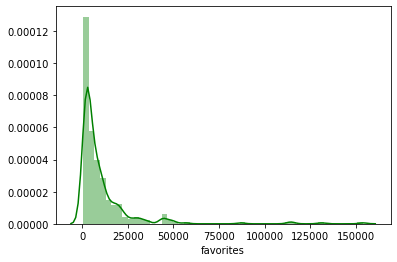

In [370]:
sns.distplot(archive_clean_2.favorites, color = 'green', label = 'Favorites');

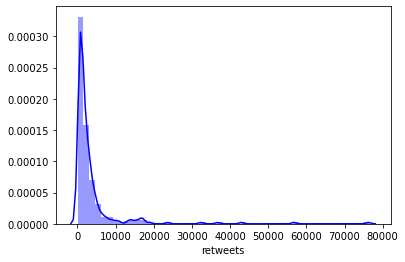

In [373]:
sns.distplot(archive_clean_2.retweets, color = 'blue', label = 'Retweets');

Trying to log transform the favorites and retweets variables so I can get a normal distribution. I'm adding some artificial jitter by setting the zero values to ones.

In [380]:
# suppress the warnings entirely
pd.options.mode.chained_assignment = None
favorities_lognormed = archive_clean_2.favorites[archive_clean_2.favorites <= 0] = 1
retweets_lognormed = archive_clean_2.retweets[archive_clean_2.retweets <= 0] = 1

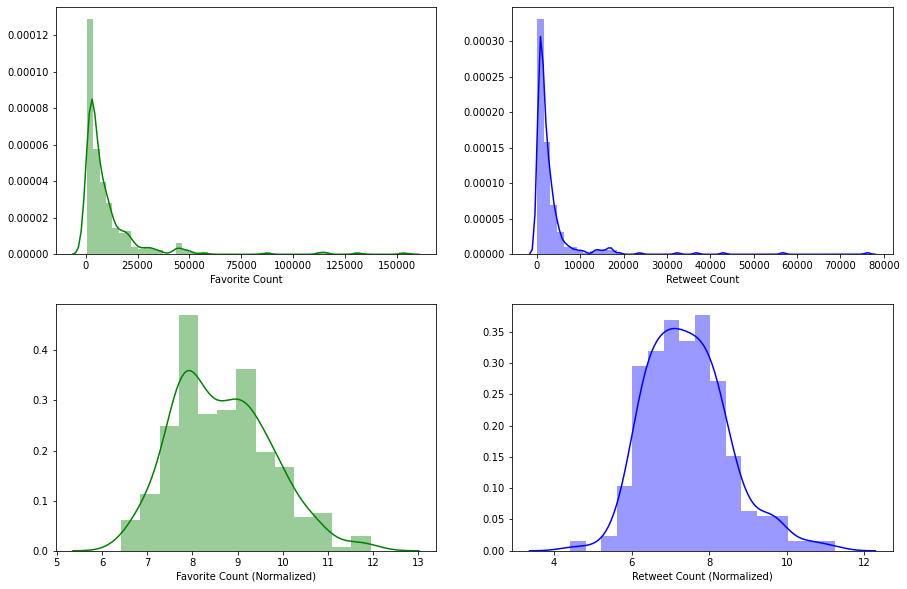

In [383]:
f, axes = plt.subplots(2,2,figsize=(15,10),sharex=False)

sns.distplot(archive_clean_2.favorites, color = 'green', ax=axes[0,0], axlabel='Favorite Count')
sns.distplot(archive_clean_2.retweets, color = 'blue', ax=axes[0,1], axlabel='Retweet Count')
sns.distplot(archive_clean_2.favorites.apply(np.log), color = 'green', ax=axes[1,0], axlabel='Favorite Count (Normalized)')
sns.distplot(archive_clean_2.retweets.apply(np.log), color = 'blue', ax=axes[1,1], axlabel='Retweet Count (Normalized)')

f.savefig('distplots.png')

The original distributions for both favorites and retweets have long positive tails. _Extremely popular tweets are extremely rare._ The normalized graphs (the bottom two) again show similar distributions. They are roughly normal except for the spike in values for the normalized favorite count. That may be due to my jitter work and not an actual attribute of the data. Or there are actually a bunch of tweets with one favorite count.

The two variables seem to have similar distributions implying that the _two measurements are representing similar phenomona_.

In [386]:
archive_clean['retweets'].describe()

count     2058.000000
mean      2537.967444
std       4433.957202
min         11.000000
25%        543.000000
50%       1198.500000
75%       2920.000000
max      76278.000000
Name: retweets, dtype: float64

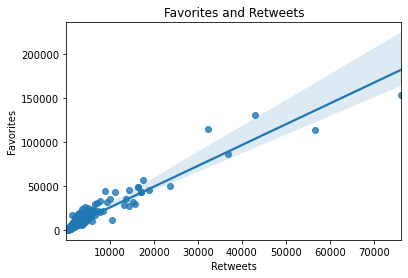

In [389]:
g = sns.regplot(x=archive_clean_2.retweets, y=archive_clean_2.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
fig = g.get_figure()
fig.savefig('scatterplot.png')

In [414]:
# archive_clean_2.corr()
# archive_clean_2.info()
archive_clean_2.corr()

,tweet_id,rating_numerator,rating_denominator,retweets,favorites,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.488191,NaN,0.274010,0.444583,0.196575,0.084934,0.184944,0.062165,0.155272,-0.065000,0.107751
rating_numerator,0.488191,1.000000,NaN,0.285111,0.346300,0.175088,0.162028,0.243095,-0.000681,0.211222,-0.084586,0.270675
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweets,0.274010,0.285111,NaN,1.000000,0.954229,0.060932,0.010870,0.081178,0.025241,-0.009878,-0.029051,0.037561
favorites,0.444583,0.346300,NaN,0.954229,1.000000,0.090316,0.030686,0.123318,0.024831,0.036594,-0.045610,0.052975
img_num,0.196575,0.175088,NaN,0.060932,0.090316,1.000000,0.221911,0.049886,-0.160023,0.123537,-0.141374,0.083230
p1_conf,0.084934,0.162028,NaN,0.010870,0.030686,0.221911,1.000000,0.199114,-0.491857,0.185609,-0.709622,0.168697
p1_dog,0.184944,0.243095,NaN,0.081178,0.123318,0.049886,0.199114,1.000000,0.106073,0.624199,-0.025851,0.584322
p2_conf,0.062165,-0.000681,NaN,0.025241,0.024831,-0.160023,-0.491857,0.106073,1.000000,0.113991,0.469331,0.122124
p2_dog,0.155272,0.211222,NaN,-0.009878,0.036594,0.123537,0.185609,0.624199,0.113991,1.000000,-0.065071,0.606157


There is a strong relationship between retweet and favorite counts (0.95). As a tweet gains Favorites, one can expect to see Retweets to increase and vice versa. It looks like it may be a nonlinear relationship.